# Online PyEmittance

The following will work either on a production system, or with a simulated EPICS server.

For local development, start a simulated EPICS server using the `simulated_epics.ipynb` notebook, or run in a separate process:

```python
from pyemittance.simulation_server import start_server
start_server()
```

In [1]:
from pyemittance import PyEmittance, print_logging
import numpy as np
print_logging() # Print log messages here

In [2]:
meas = PyEmittance(config_name='LCLS2_OTR0H04')
meas.online = True

# Set some other options
meas.add_pnts = False
meas.num_points = 7   # only matters if adapt_ranges is used.
meas.adapt_ranges = True  # If helping, will ensure there are at least 7 total points
meas.check_sym = True
meas.infl_check = True

meas.show_plots = True
meas

In [3]:
meas.config_dict['img_proc']

{'subtract_bg': False,
 'use_roi': False,
 'avg_ims': True,
 'n_to_acquire': 1,
 'background_im': '/home/physics3/ml_tuning/20220805_LCLS2_inj/example_images/bg_8_6_22.npy',
 'amp_threshold': 150,
 'min_sigma': 3,
 'max_sigma': 700,
 'max_samples': 1,
 'roi': {'xmin': 0, 'xmax': 100, 'ymin': 0, 'ymax': 100}}

2023-01-05 23:24:15,882 | INFO : Running online!
2023-01-05 23:24:15,924 | INFO : EPICS put QUAD:HTR:120:BCTRL = -6
2023-01-05 23:24:16,911 | INFO : 2023-01-05_23-24-16-911502
2023-01-05 23:24:17,017 | INFO : EPICS put QUAD:HTR:120:BCTRL = -4
2023-01-05 23:24:17,415 | INFO : 2023-01-05_23-24-17-415353
2023-01-05 23:24:17,523 | INFO : EPICS put QUAD:HTR:120:BCTRL = -2
2023-01-05 23:24:17,899 | INFO : 2023-01-05_23-24-17-899824
2023-01-05 23:24:17,997 | INFO : EPICS put QUAD:HTR:120:BCTRL = 0
2023-01-05 23:24:18,375 | INFO : 2023-01-05_23-24-18-375373
2023-01-05 23:24:18,478 | INFO : EPICS put QUAD:HTR:120:BCTRL = -0.746355912488518
2023-01-05 23:24:18,865 | INFO : 2023-01-05_23-24-18-864974
2023-01-05 23:24:19,045 | INFO : EPICS put QUAD:HTR:120:BCTRL = -0.20529659374043163
2023-01-05 23:24:19,429 | INFO : 2023-01-05_23-24-19-429505
2023-01-05 23:24:19,532 | INFO : EPICS put QUAD:HTR:120:BCTRL = 0.3357627250076547
2023-01-05 23:24:19,945 | INFO : 2023-01-05_23-24-19-945011
2023-01-05 23

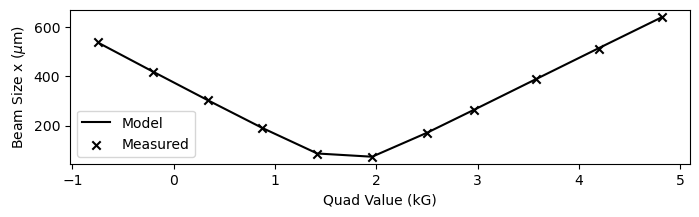

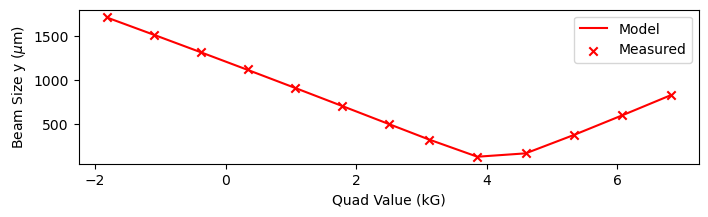

In [4]:
result = meas.measure_emittance()

# Examine results

In [5]:
import matplotlib.pyplot as plt

In [6]:
result

{'quadvalsx': array([-0.74635591, -0.20529659,  0.33576273,  0.87682204,  1.41788136,
         1.95894068,  2.5       ,  2.96376513,  3.58211864,  4.20047214,
         4.81882565]),
 'beamsizesx': array([5.37218578e-04, 4.17706599e-04, 3.03339950e-04, 1.91041042e-04,
        8.71057087e-05, 7.40796101e-05, 1.71104496e-04, 2.63427899e-04,
        3.90539831e-04, 5.11697162e-04, 6.41537399e-04]),
 'beamsizeserrx': array([0.03267978, 0.02281383, 0.01560533, 0.00685061, 0.001758  ,
        0.00181391, 0.00694195, 0.00897452, 0.0202633 , 0.02955511,
        0.04057481]),
 'error_x': False,
 'emit_x': 6.383175468193404e-09,
 'norm_emit_x': 9.993046365550567e-07,
 'beta_x': 10.01148977601619,
 'alpha_x': -2.00328899410117,
 'emit_x_err': 2.0119692412565526e-07,
 'norm_emit_x_err': 3.1497962125783036e-05,
 'beta_x_rel_err': 31.51987989805316,
 'alpha_x_rel_err': -1.8113946175154865e-15,
 'sigma_11': 6.390509593833561e-08,
 'sigma_12': 1.2787345162848427e-08,
 'sigma_22': 3.1963198297780234e-09

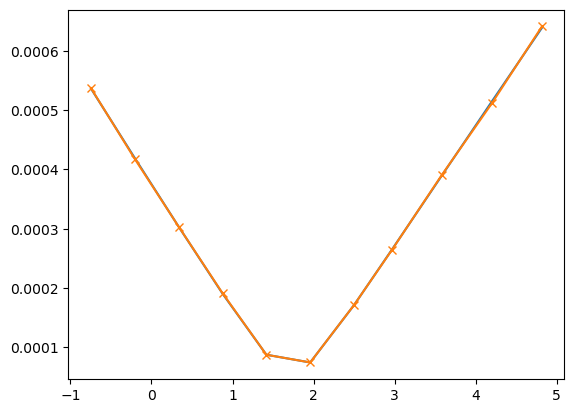

In [7]:
plt.plot(result['quadvalsx'], np.sqrt(result['screen_sigma_11']))
plt.plot(result['quadvalsx'], result['beamsizesx'], marker='x')

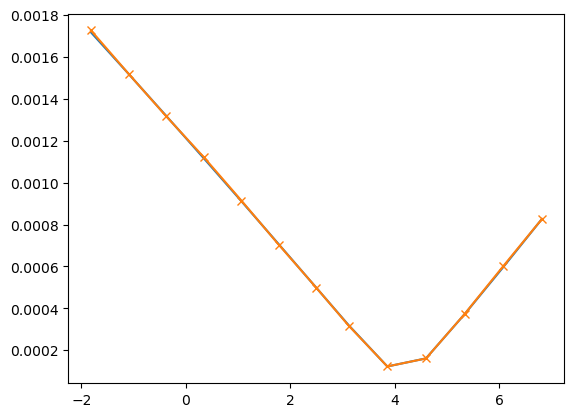

In [8]:
plt.plot(result['quadvalsy'], np.sqrt(result['screen_sigma_33']))
plt.plot(result['quadvalsy'], result['beamsizesy'], marker='x')

# Interactively change the quad and acquire the screen image

0.00037486171231124573


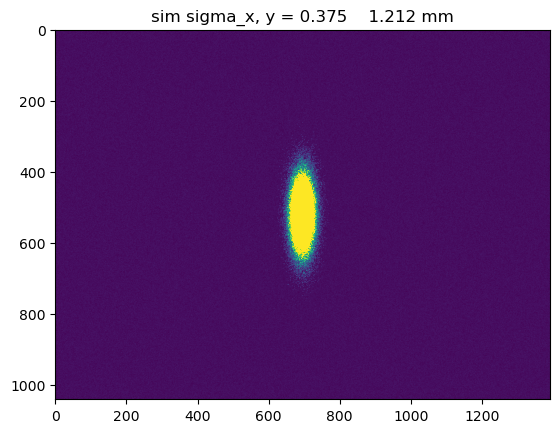

In [9]:
import epics
import matplotlib.pyplot as plt

from ipywidgets import interact

def f(quad_value):
    epics.caput('QUAD:HTR:120:BCTRL', quad_value)
    a = epics.caget('OTRS:HTR:330:Image:ArrayData').reshape(1040, 1392)
    sigma_x = epics.caget('sim_screen_sigma_x')
    sigma_y = epics.caget('sim_screen_sigma_y')  
    print(sigma_x)
    plt.imshow(a, vmax=128)
    plt.title(f'sim sigma_x, y = {sigma_x*1e3:0.3f}    {sigma_y*1e3:0.3f} mm')
    
# interact(f, quad_value=(-4, 4, .1))    
f(0)